In [48]:
import numpy as np
import pandas as pd

In [49]:
dataset = pd.read_csv('train.csv')
dataset

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [50]:
df = dataset.loc[:, ['title', 'label']]
df.head()

,title,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,Why the Truth Might Get You Fired,1
3,15 Civilians Killed In Single US Airstrike Hav...,1
4,Iranian woman jailed for fictional unpublished...,1


In [51]:
df.shape

(20800, 2)

In [52]:
df.isnull().sum()

title    558
label      0
dtype: int64

In [53]:
df = df.dropna()

In [54]:
df.isnull().sum(), df.shape

(title    0
 label    0
 dtype: int64,
 (20242, 2))

In [55]:
df['title'][:5]

0    House Dem Aide: We Didn’t Even See Comey’s Let...
1    FLYNN: Hillary Clinton, Big Woman on Campus - ...
2                    Why the Truth Might Get You Fired
3    15 Civilians Killed In Single US Airstrike Hav...
4    Iranian woman jailed for fictional unpublished...
Name: title, dtype: object

In [56]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import string

In [57]:
df['title'][20795]

'Rapper T.I.: Trump a ’Poster Child For White Supremacy’'

In [58]:
n = re.sub('.+:', '',df['title'][0])
n

' We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [59]:
def preprocessing(news):
    news = re.sub('.+:', '',news)
    
    punc = string.punctuation
    no_punc_news = ''
    for i in news:
        if i not in punc and i!='’':
            no_punc_news+=i
    no_punc_news = re.sub(u"(\u2018|\u2019)", "", no_punc_news)
    
    
    news = no_punc_news.strip()
    
    news = news.lower()
    
    news = word_tokenize(news)
    
    ps = PorterStemmer()
    
    news = [ps.stem(n) for n in news]
    
    news = ' '.join(news)

    return news
    
    

In [60]:
preprocessing(df['title'][0]), df.title[0]

('we didnt even see comey letter until jason chaffetz tweet it',
 'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It')

In [61]:
df['preprocessed_title'] = df['title'].apply(preprocessing)

In [62]:
df.preprocessed_title

0        we didnt even see comey letter until jason cha...
1             hillari clinton big woman on campu breitbart
2                         whi the truth might get you fire
3        15 civilian kill in singl us airstrik have bee...
4        iranian woman jail for fiction unpublish stori...
                               ...                        
20795             trump a poster child for white supremaci
20796            schedul matchup and odd the new york time
20797    maci is said to receiv takeov approach by huds...
20798       nato russia to hold parallel exercis in balkan
20799                               what keep the f35 aliv
Name: preprocessed_title, Length: 20242, dtype: object

In [63]:
X = df.preprocessed_title.values
Y = df.label.values
X, Y

(array(['we didnt even see comey letter until jason chaffetz tweet it',
        'hillari clinton big woman on campu breitbart',
        'whi the truth might get you fire', ...,
        'maci is said to receiv takeov approach by hudson bay the new york time',
        'nato russia to hold parallel exercis in balkan',
        'what keep the f35 aliv'], dtype=object),
 array([1, 0, 1, ..., 0, 1, 1]))

In [64]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer

In [65]:
tokenizer = Tokenizer()

In [66]:
tokenizer.fit_on_texts(X)

In [67]:
tokenizer.word_counts

OrderedDict([('we', 307),
             ('didnt', 50),
             ('even', 214),
             ('see', 126),
             ('comey', 143),
             ('letter', 56),
             ('until', 28),
             ('jason', 17),
             ('chaffetz', 7),
             ('tweet', 62),
             ('it', 902),
             ('hillari', 1133),
             ('clinton', 1133),
             ('big', 145),
             ('woman', 135),
             ('on', 2037),
             ('campu', 26),
             ('breitbart', 2368),
             ('whi', 331),
             ('the', 11304),
             ('truth', 71),
             ('might', 34),
             ('get', 309),
             ('you', 487),
             ('fire', 158),
             ('15', 38),
             ('civilian', 56),
             ('kill', 315),
             ('in', 3650),
             ('singl', 22),
             ('us', 868),
             ('airstrik', 35),
             ('have', 383),
             ('been', 86),
             ('identifi', 18),
        

In [68]:
tokenizer.word_index

{'the': 1,
 'new': 2,
 'time': 3,
 'york': 4,
 'to': 5,
 'in': 6,
 'of': 7,
 'trump': 8,
 'a': 9,
 'breitbart': 10,
 'for': 11,
 'and': 12,
 'on': 13,
 'is': 14,
 'with': 15,
 'hillari': 16,
 'clinton': 17,
 'by': 18,
 'at': 19,
 'it': 20,
 'us': 21,
 'as': 22,
 'from': 23,
 'donald': 24,
 'be': 25,
 'after': 26,
 'are': 27,
 'elect': 28,
 'will': 29,
 'say': 30,
 '”': 31,
 '“': 32,
 'not': 33,
 'your': 34,
 'that': 35,
 'obama': 36,
 'what': 37,
 'over': 38,
 '–': 39,
 'how': 40,
 'you': 41,
 'about': 42,
 'russia': 43,
 'news': 44,
 'thi': 45,
 'presid': 46,
 'state': 47,
 'vote': 48,
 'war': 49,
 'america': 50,
 'have': 51,
 'hi': 52,
 'who': 53,
 'video': 54,
 'an': 55,
 'world': 56,
 'fbi': 57,
 'up': 58,
 'out': 59,
 'attack': 60,
 'ha': 61,
 'american': 62,
 'email': 63,
 'whi': 64,
 'no': 65,
 'call': 66,
 'kill': 67,
 'get': 68,
 'he': 69,
 'we': 70,
 'more': 71,
 'now': 72,
 'day': 73,
 'wa': 74,
 'polic': 75,
 'white': 76,
 'against': 77,
 'just': 78,
 'hous': 79,
 'year': 8

In [69]:
sequences = tokenizer.texts_to_sequences(X)
sequences

[[70, 638, 111, 212, 181, 580, 1143, 1712, 3159, 519, 20],
 [16, 17, 174, 196, 13, 1225, 10],
 [64, 1, 453, 964, 68, 41, 156],
 [848, 581, 67, 6, 1397, 21, 929, 51, 345, 1633],
 [1561, 196, 715, 11, 3474, 8550, 325, 42, 196, 1887, 5, 194, 11, 8551],
 [474,
  230,
  374,
  8,
  81,
  69,
  292,
  200,
  383,
  38,
  1300,
  7,
  3475,
  1341,
  1398,
  54,
  10],
 [4375, 271, 502, 1990, 2512, 1090, 5, 3872, 19, 281, 490, 8552, 877],
 [6265, 6266, 100, 503, 2700, 209, 346, 1108, 1, 2, 4, 3],
 [6267, 23, 9, 2093, 2513, 11, 24, 8, 6268, 15, 9, 94, 728, 1888, 1, 2, 4, 3],
 [9, 6269, 84, 11, 965, 12, 43, 6270, 7, 8, 1301, 1, 2, 4, 3],
 [36, 901, 11, 675, 2094, 15, 5089, 8553, 5, 1399, 8, 930],
 [1491, 2214, 5090, 231, 6271, 7, 147, 441, 1226],
 [96, 1227, 769, 313, 1342, 272, 849, 3873, 3160, 6, 1, 2701, 442],
 [21, 166, 212, 65, 459, 443, 8, 12, 43],
 [2095, 282, 27, 831, 158, 1400, 13, 511, 82, 2353, 3161, 12, 1144],
 [6, 491, 1562, 1492, 5091, 128, 9, 207, 12, 994, 1, 2, 4, 3],
 [676, 163

In [70]:
max_len = max([len(x) for x in sequences])

In [71]:
from keras.utils import pad_sequences

In [72]:
sequences = pad_sequences(sequences=sequences, maxlen=max_len, padding='post')
sequences

array([[  70,  638,  111, ...,    0,    0,    0],
       [  16,   17,  174, ...,    0,    0,    0],
       [  64,    1,  453, ...,    0,    0,    0],
       ...,
       [6077,   14,  481, ...,    0,    0,    0],
       [ 565,   43,    5, ...,    0,    0,    0],
       [  37,  267,    1, ...,    0,    0,    0]], dtype=int32)

In [73]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

In [74]:
seq_len = len(sequences[0])
total_words = len(tokenizer.word_index)+1
seq_len, total_words,len(sequences), len(Y)

(67, 17362, 20242, 20242)

In [75]:
X_train = sequences[:19500]
Y_train = Y[:19500]

X_test = sequences[19500:]
Y_test = Y[19500:]
len(X_train), len(Y_train)

(19500, 19500)

In [76]:
model = Sequential()
model.add(Embedding(output_dim=10, input_dim=total_words, input_length=seq_len))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 67, 10)            173620    
                                                                 
 lstm_2 (LSTM)               (None, 100)               44400     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 218,121
Trainable params: 218,121
Non-trainable params: 0
_________________________________________________________________


2023-05-05 13:07:39.595021: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-05 13:07:39.596755: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-05 13:07:39.597987: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [79]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [81]:
history  = model.fit(X_train, Y_train, epochs=5, validation_data=(X_test, Y_test))

Epoch 1/5
610/610 [==============================] - 21s 35ms/step - loss: 0.0911 - accuracy: 0.9697 - val_loss: 0.3047 - val_accuracy: 0.8976
Epoch 2/5
610/610 [==============================] - 20s 33ms/step - loss: 0.0676 - accuracy: 0.9783 - val_loss: 0.3877 - val_accuracy: 0.9016
Epoch 3/5
610/610 [==============================] - 22s 36ms/step - loss: 0.0408 - accuracy: 0.9871 - val_loss: 0.3992 - val_accuracy: 0.9057
Epoch 4/5
610/610 [==============================] - 20s 34ms/step - loss: 0.0352 - accuracy: 0.9881 - val_loss: 0.4343 - val_accuracy: 0.8922
Epoch 5/5
610/610 [==============================] - 23s 37ms/step - loss: 0.0307 - accuracy: 0.9899 - val_loss: 0.5410 - val_accuracy: 0.8908


In [82]:
import matplotlib.pyplot as plt

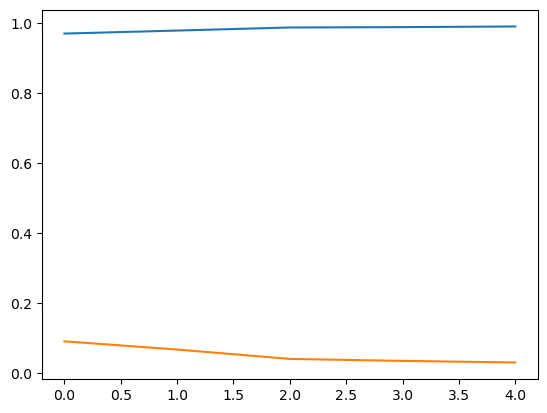

In [83]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])

In [95]:
model.predict(np.array([sequences[0]]))

1/1 [==============================] - 0s 36ms/step


array([[0.9679458]], dtype=float32)

In [84]:
model.save('model.h5')

In [85]:
from keras.models import load_model
lstm = load_model('model.h5')

2023-05-05 13:32:30.946059: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-05 13:32:30.947813: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-05 13:32:30.949228: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [156]:
def prediction(news, verbose=1):
    news = preprocessing(news)
    sequences = tokenizer.texts_to_sequences([news])
    sequences = pad_sequences(sequences=sequences, maxlen=max_len, padding='post')
    
    pred = lstm.predict(sequences, verbose=verbose)
    
    if pred>0.5:
        pred = 1
    else:
        pred = 0
            
    return pred

In [157]:
prediction(df.title[0]), df.title[0]

1/1 [==============================] - 0s 39ms/step


(1,
 'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It')

In [158]:
prediction('Hello this is a fake news')

1/1 [==============================] - 0s 30ms/step


0

In [159]:
def accuracy(testing, labels):
    y_pred = []
    for test in testing:
        y_pred.append(prediction(test, verbose=0))

        
    accuracy = sum(y_pred==labels)/len(labels)
    return accuracy

In [ ]:
accuracy()